In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


### 실시간 상담결과 피드백 - 상담 과정 전반에 대한 사용자 평가 기록

---



##### Ultrafeedback dataset 소개


In [ ]:
from datasets import load_dataset

dataset = load_dataset("HuggingFaceH4/ultrafeedback_binarized")

In [ ]:
print(dataset)

DatasetDict({
    train_prefs: Dataset({
        features: ['prompt', 'prompt_id', 'chosen', 'rejected', 'messages', 'score_chosen', 'score_rejected'],
        num_rows: 61135
    })
    train_sft: Dataset({
        features: ['prompt', 'prompt_id', 'chosen', 'rejected', 'messages', 'score_chosen', 'score_rejected'],
        num_rows: 61135
    })
    test_prefs: Dataset({
        features: ['prompt', 'prompt_id', 'chosen', 'rejected', 'messages', 'score_chosen', 'score_rejected'],
        num_rows: 2000
    })
    test_sft: Dataset({
        features: ['prompt', 'prompt_id', 'chosen', 'rejected', 'messages', 'score_chosen', 'score_rejected'],
        num_rows: 1000
    })
    train_gen: Dataset({
        features: ['prompt', 'prompt_id', 'chosen', 'rejected', 'messages', 'score_chosen', 'score_rejected'],
        num_rows: 61135
    })
    test_gen: Dataset({
        features: ['prompt', 'prompt_id', 'chosen', 'rejected', 'messages', 'score_chosen', 'score_rejected'],
        num_rows

In [ ]:
print(dataset['train_prefs'][0]['prompt'])

how can i develop a habit of drawing daily


In [ ]:
print(dataset['train_prefs'][0]['chosen'][0])
print(dataset['train_prefs'][0]['chosen'][1])
print(dataset['train_prefs'][0]['score_chosen'])

{'content': 'how can i develop a habit of drawing daily', 'role': 'user'}
{'content': "Developing a daily habit of drawing can be challenging but with consistent practice and a few tips, it can become an enjoyable and rewarding part of your daily routine. Here are some strategies to help you develop the habit of drawing daily:\n\n1. Set a specific time: Allocate a specific time of the day to draw. It could be in the morning, afternoon, or evening. Make drawing a part of your daily routine.\n2. Set a specific duration: Determine the amount of time you want to spend on drawing each day. It can be as little as 10 minutes or as long as an hour. Be consistent with the duration to help build the habit.\n3. Start small and simple: Don't try to create a masterpiece every day, start with simple and easy-to-do sketches. Focus on improving your skills gradually.\n4. Use a variety of tools and mediums: Experiment with different tools like pencils, pens, markers, and different mediums like paper, c

In [ ]:
print(dataset['train_prefs'][0]['rejected'][0])
print(dataset['train_prefs'][0]['rejected'][1])
print(dataset['train_prefs'][0]['score_rejected'])

{'content': 'how can i develop a habit of drawing daily', 'role': 'user'}
{'content': "As an AI language model, I cannot personally develop habits for you. But, here are some tips for developing a habit of drawing daily:\n\n1. Start small: Start with simple drawings or doodles and gradually increase the complexity of your drawings.\n\n2. Set a schedule: Set a specific time every day to draw, and try to stick to it as much as possible.\n\n3. Make it fun: Don't pressure yourself to create masterpieces every time you draw. Make it a relaxing and enjoyable experience.\n\n4. Use resources: There are many drawing tutorials available online. Use resources like YouTube or online drawing courses to help you improve your skills.\n\n5. Surround yourself with inspiration: Expose yourself to a variety of art forms, such as paintings, illustrations, and photographs, to inspire and motivate you.\n\nRemember, everyone has their own creative style and pace. Just keep practicing and enjoying the process

##### Ultrafeedback dataset 분석

In [ ]:
chosen_scores = [instance['score_chosen'] for instance in dataset['train_prefs']]
reject_scores = [instance['score_rejected'] for instance in dataset['train_prefs']]

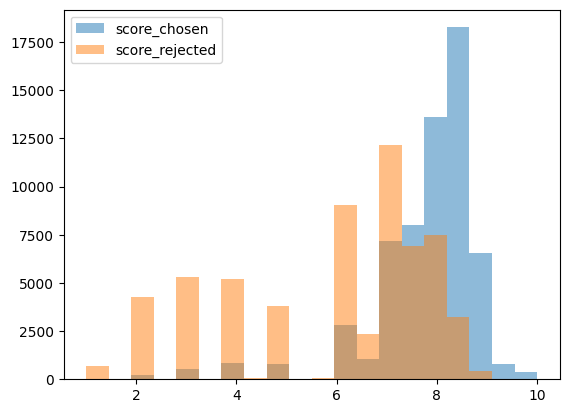

In [ ]:
import matplotlib.pyplot as plt

plt.hist(chosen_scores, bins=20, alpha=0.5, label='score_chosen')
plt.hist(reject_scores, bins=20, alpha=0.5, label='score_rejected')
plt.legend(loc='upper left')
plt.show()

In [ ]:
chosen_len = [len(instance['chosen'][1]['content']) for instance in dataset['train_prefs']]
reject_len = [len(instance['rejected'][1]['content']) for instance in dataset['train_prefs']]

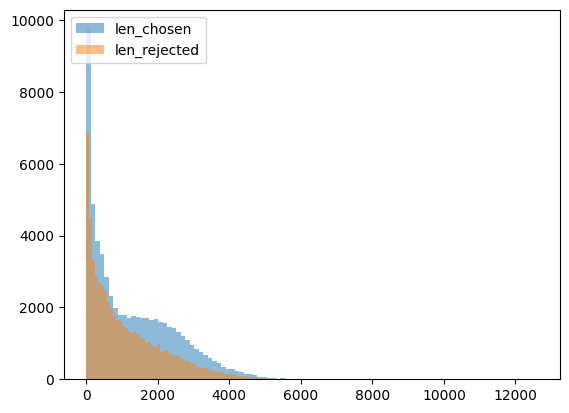

In [ ]:
import matplotlib.pyplot as plt

plt.hist(chosen_len, bins=100, alpha=0.5, label='len_chosen')
plt.hist(reject_len, bins=100, alpha=0.5, label='len_rejected')
plt.legend(loc='upper left')
plt.show()

In [ ]:
for instance in dataset['train_prefs']:
  if instance['score_rejected'] < 2 and instance['score_chosen'] > 9:
    print(f"Prompt: {instance['chosen'][0]['content']}\n")
    print(f"Chosen: {instance['chosen'][1]['content']}\n")
    print(f"Rejected: {instance['rejected'][1]['content']}")
    print("==========================================================\n")


Prompt: Q: In this task, given a sentence in the English language, your task is to convert it into the Bahasa (Indonesian) language.
He then promised that as president he would hunt Osama bin Laden to the "gates of hell."
A:

Chosen: Dia kemudian berjanji bahwa sebagai presiden, dia akan memburu Osama bin Laden hingga ke "gerbang neraka."

Rejected: .....

Prompt: A text is given in Urdu. Translate it from the Urdu language to the Marathi language. The translation must not omit or add information to the original sentence.

ڈائس پر موجود بنگلہ دیش کی وزیراعظم محترمہ شیخ حسینہ جی، مغربی بنگال کے گورنر جناب کیسری ناتھ ترپاٹھی جی، مغربی بنگال کی وزیر اعلی محترمہ ممتا بنرجی جی، وشو بھارتی کے پروفیسر سبوج کولی سین جی اور رام کرشنن مشن وویکا نند انسٹی ٹیوٹ کے سوامی آتم پریا نند جی اور یہاں موجود وشوبھارتی کے پروفیسر حضرات اور میرے پیارے نوجوان ساتھیو!

Chosen: डायसवरील बांग्लादेशच्या पंतप्रधान माननीय शेख हसिना जी, पश्चिम बंगालचे गव्हर्नर जनाब केसरी नात्थ त्रिपाठी जी, पश्चिम बंगालच्या मुख्यमंत

In [ ]:
!pip install -q gradio
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 5.1 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI

OPENAI_API_KEY= # OpenAI API Key
model_name="gpt-3.5-turbo"

In [ ]:
def chatbotapi(history, input):
  client = OpenAI(
    api_key=OPENAI_API_KEY,
  )
  messages = "\n".join(history) + input
  chat_completion = client.chat.completions.create(
    messages=[{
        "role": "user",
        "content": messages
    }],
    model="gpt-3.5-turbo",
  )
  response = chat_completion.choices[0].message.content

  return history + [(input, response)]

In [ ]:
chatbotapi([], "Hi")

[('Hi', 'Hello! How can I assist you today?')]

In [ ]:
import gradio as gr

In [ ]:
def vote(data: gr.LikeData):
    if data.liked:
        print("You upvoted this response: " + data.value)
    else:
        print("You downvoted this response: " + data.value)

In [ ]:
with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    textbox = gr.Textbox()
    textbox.submit(chatbotapi, [chatbot, textbox], [chatbot])
    chatbot.like(vote, None, None)  # Adding this line causes the like/dislike icons to appear in your chatbot

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c5ac1d6a7322fd2fcd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
